<a href="https://colab.research.google.com/github/martinweston333/arduinoaccelerometers/blob/main/Arduino_Accelerometer_and_Gyro_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

# Import data
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/🏀 General/⚾ MWNH/Medical Device/Device Data.csv')

# Constants
gravity = 9.81
interval = 0.11 #seconds

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0


# **Functions**

In [ ]:
# "Zero" the time readings
def zerotime(df, time, time_to_zero):
  df[time_to_zero] = (df[time] - df[time][0]) * 1000

# Estimate position based on linear acceleration
def posest(df, g_units, position):
  g_units_to_zero = df[g_units] - df[g_units][0]
  mmps2 = g_units_to_zero * gravity * 1000
  linear_velocity = (mmps2 + mmps2.shift(1)) / 2 * interval
  linear_displacement = linear_velocity * interval
  df[position] = linear_displacement + linear_displacement.shift(1)

# Estimate orientation based on angular acceleration 
def orest(df, angular_acceleration, orientation):
  angular_acceleration_to_zero = df[angular_acceleration] - df[angular_acceleration][0]
  angular_velocity = (angular_acceleration_to_zero + angular_acceleration_to_zero.shift(1)) / 2 * interval
  angular_displacment = angular_velocity * interval
  df[orientation] = angular_displacment + angular_displacment.shift(1)

# **"Zero" Time Readings**

In [ ]:
zerotime(df, "Time(ms)", "Time Elapsed (s)")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),Time Elapsed (s)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111000
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222000
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332000
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444000


# **Estimate Position**

In [ ]:
posest(df, "A-X1", "L-R position estimate")
posest(df, "A-Y1", "U-D position estimate")
posest(df, "A-Z1", "I-O position estimate")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),Time Elapsed (s),L-R position estimate,U-D position estimate,I-O position estimate
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111000,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222000,2.142553,4.154535,-6.522620
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332000,-3.418589,6.504815,3.329563
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444000,-20.594624,10.730570,5.038857


# **Estimate Orientation**

In [ ]:
orest(df, "G-X", "Roll (x)")
orest(df, "G-Y", "Pitch (y)")
orest(df, "G-Z", "Yaw (z)")
df.head()

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),Time Elapsed (s),L-R position estimate,U-D position estimate,I-O position estimate,Roll (x),Pitch (y),Yaw (z)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111000,NaN,NaN,NaN,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222000,2.142553,4.154535,-6.522620,0.179987,0.079195,-0.002541
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332000,-3.418589,6.504815,3.329563,0.266381,0.791098,-0.026681
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444000,-20.594624,10.730570,5.038857,0.284592,2.185260,-0.056326


# **Plot Data**

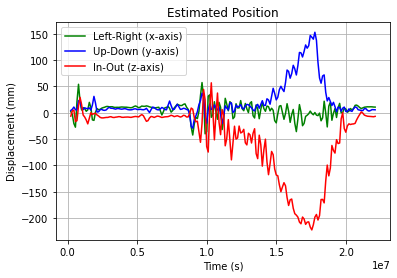

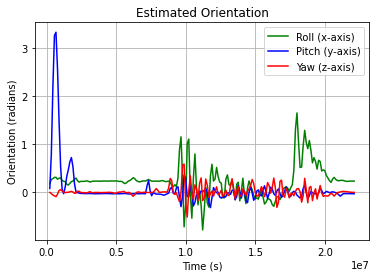

,Date (yy/mm/dd),Time (hh/mm/ss),Time(ms),Ambient temp (oC),Liquid temp (oC),A-X1,A-Y1,A-Z1,G-X,G-Y,G-Z,Mass(g),Time Elapsed (s),L-R position estimate,U-D position estimate,I-O position estimate,Roll (x),Pitch (y),Yaw (z)
0,1/10/2001,5:29:02,658987,63.00,66.75,-0.0332,-1.0102,0.0332,-5.39,-2.94,-3.92,30.4,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2001,5:29:02,659098,62.50,64.25,-0.0010,-0.9789,-0.0059,3.85,-3.78,-4.48,46.2,111000,NaN,NaN,NaN,NaN,NaN,NaN
2,1/10/2001,5:29:02,659209,61.00,62.00,-0.0615,-1.0028,0.0015,5.88,11.83,-3.22,78.4,222000,2.142553,4.154535,-6.522620,0.179987,0.079195,-0.002541
3,1/10/2001,5:29:02,659319,60.25,60.75,-0.0664,-0.9467,0.1918,6.86,99.12,-9.17,87.8,332000,-3.418589,6.504815,3.329563,0.266381,0.791098,-0.026681
4,1/10/2001,5:29:02,659431,59.25,59.25,-0.2855,-0.9638,-0.1674,5.88,139.37,-3.43,47.0,444000,-20.594624,10.730570,5.038857,0.284592,2.185260,-0.056326
5,1/10/2001,5:29:02,659542,58.50,58.25,0.0415,-1.0687,-0.0054,10.99,149.17,-11.76,28.1,555000,-27.485217,5.804479,-16.689361,0.309578,3.259679,-0.073265
6,1/10/2001,5:29:03,659653,57.50,57.50,0.4270,-0.8530,0.0556,2.03,100.94,-3.92,5.9,666000,21.205934,5.139753,-15.158118,0.311272,3.329980,-0.091899
7,1/10/2001,5:29:03,659764,57.00,56.75,-0.1196,-0.8847,0.2440,8.26,61.88,-2.59,32.9,777000,53.931799,22.636281,12.879058,0.271463,2.569374,-0.039385
8,1/10/2001,5:29:03,659874,56.50,56.00,0.0376,-1.0180,0.0795,8.47,9.66,-0.42,27.4,887000,21.259349,23.763940,29.099550,0.293909,1.489026,0.037268
9,1/10/2001,5:29:03,659986,55.75,55.25,-0.0010,-0.9799,-0.0117,2.80,-4.13,-3.29,-7.5,999000,5.187234,8.320940,15.342104,0.299838,0.537421,0.054208


In [7]:
# Plot Position
plt.plot(df["Time Elapsed (s)"], df["L-R position estimate"], label = "Left-Right (x-axis)", color = "Green")
plt.plot(df["Time Elapsed (s)"], df["U-D position estimate"], label = "Up-Down (y-axis)", color = "Blue")
plt.plot(df["Time Elapsed (s)"], df["I-O position estimate"], label = "In-Out (z-axis)", color = "Red")
plt.title('Estimated Position')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (mm)')
plt.grid(True)
plt.legend()
plt.show()

# Plot angle
plt.plot(df["Time Elapsed (s)"], df["Roll (x)"], label = "Roll (x-axis)", color = "Green")
plt.plot(df["Time Elapsed (s)"], df["Pitch (y)"], label = "Pitch (y-axis)", color = "Blue")
plt.plot(df["Time Elapsed (s)"], df["Yaw (z)"], label = "Yaw (z-axis)", color = "Red")
plt.title('Estimated Orientation')
plt.xlabel('Time (s)')
plt.ylabel('Orientation (radians)')
plt.grid(True)
plt.legend()
plt.show()

df.head(10)